In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('sml/datasets/iris.txt', delimiter=',')
y = data[:,-1]
X = data[:,:-1]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# normalize the data to zero mean and unit variance
normed = (X - X.mean(axis=0)) / X.std(axis=0)
normed.mean(axis=0), normed.std(axis=0)

(array([-1.69031455e-15, -1.63702385e-15, -1.48251781e-15, -1.62314606e-15]),
 array([1., 1., 1., 1.]))

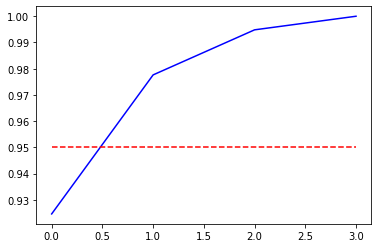

In [11]:
cov = np.cov(X.T)
eigvalues, eigvectors = np.linalg.eigh(cov)

lst = list((zip(eigvalues, eigvectors)))
lst.sort(key=lambda x: x[0], reverse=True) # sort by the eigenvalues

eigvalues = np.sort(eigvalues)[::-1]
cumulative_variance = []

sum = 0
for i in eigvalues:
    sum += i.real / eigvalues.sum().real
    cumulative_variance.append(sum)

plt.plot(cumulative_variance, 'b-')
plt.plot([0, 3], [0.95, 0.95], 'r--')

In [12]:
# get the eigenvector for the largest eigenvalue
u1 = lst[0][1]
u2 = lst[1][1]
u3 = lst[2][1]
print(u1, u2, u3)
B = np.vstack((u1, u2, u3)).T

[ 0.75112056 -0.54906091 -0.07470647 -0.35884393] [-0.47971899 -0.07252408 -0.1757674  -0.85657211] [-0.32409435 -0.59641809  0.72971237  0.08226889]


(150, 3)


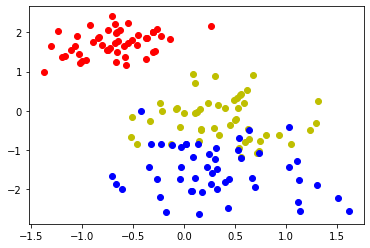

In [13]:
projections = normed@B
print(projections.shape)
versicolor = projections[:50]
setosa = projections[50:100]
virginica = projections[100:]
versicolor[:,0]

plt.plot(versicolor[:,0], versicolor[:,1], 'ro')
plt.plot(setosa[:,0], setosa[:,1], 'yo')
plt.plot(virginica[:,0], virginica[:,1], 'bo')